# Eye Alert

### Using Deep Learning to Avoid Sleep Related Accidents 

## Introduction

A study reported by local Texas news networks revealed that Texas led the country in sleep-related fatalities in 2016. It was not even close; Texas recorded 159 sleep related fatalities and Alabama came in second with 43. In Texas, it is legal to spend up to 24 hours in rest areas to take a break from the wheel and get a much-needed power nap. So, why do tired drivers fail to recognize when it is time to pull the car over and rest? This project will incorporate deep learning, convolutional neural network modeling, and computer vision to alert drivers when it is time to pull over.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt 
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

## Data

The data for this project consists of 8500 total images obtained via webcam. A separate code was constructed to detect and write a file for each frame of video captured. The images only contain the region of interest (eyepair), as seen below:

  

The data was distributed amongst file folders to create test and training sets of images.

|         | Test Images | Train Images |   |   |
|---      |-----|-------|---|---|
|Open     | 1000    | 3500     |   |   |
|Closed   | 1000    | 3000      |   |   |

In [2]:
# Assign variables
train_data_path = (r'C:\Users\felix\Desktop\Final Project - Eye Alert\data\train')
test_data_path = (r'C:\Users\felix\Desktop\Final Project - Eye Alert\data\test')
img_rows = 24
img_cols = 24
epochs = 20
batch_size = 40
num_of_train_samples = 6500
num_of_test_samples = 2000

# Image Generator - Extract images into train and validation batches
train_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    color_mode = 'grayscale',
                                                    shuffle = True)

validation_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        color_mode = 'grayscale',
                                                        shuffle = False)

Found 6500 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


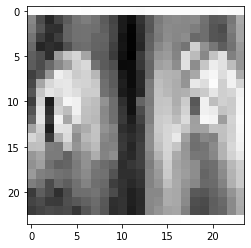

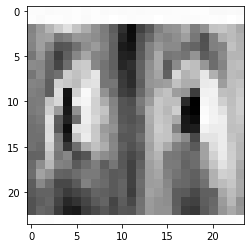

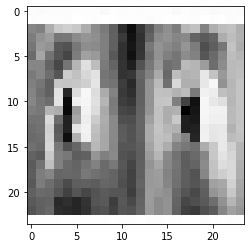

In [28]:
# Images Eyes Open
x,y = validation_generator.next()
for i in range(37,40):
    image = x[i]
    plt.imshow(image[:], cmap = 'Greys')
    plt.show()

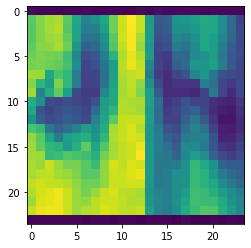

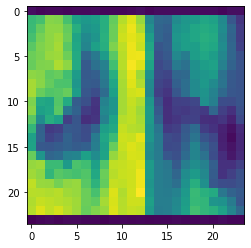

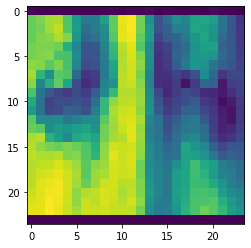

In [98]:
# Images Eyes Closed
x,y = validation_generator.next()
for i in range(37,40):
    image = x[i]
    plt.imshow(image[:])
    plt.show()

## Modeling

### Sequential Model

In [138]:
# Instantiate Keras sequential model
model = Sequential()

# First convolutional layer. 32 convolution filters and 3x3 kernels
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

# 64 convolution filters and 3x3 kernels
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

# Flatten before applying dense layer
model.add(Flatten())

# 128 convolution filters
# Add dense layers to create a fully connected MLP (multilayer perceptron)
model.add(Dense(128))
model.add(Activation('relu'))

# Dropout layers remove features and fight overfitting for better generalization
model.add(Dropout(0.25))

# End with a number of units equal to the number of classes
model.add(Dense(2))
model.add(Activation('softmax'))

#### Model configuration and training

In [139]:
# Configure model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train model
model_alert = model.fit_generator(train_generator, steps_per_epoch = num_of_train_samples // batch_size, epochs = epochs, 
          validation_data = validation_generator, validation_steps = num_of_test_samples // batch_size)

# Save model to directory
model.save(r'C:\Users\felix\Desktop\Final Project - Eye Alert\models\cnn3Cat2.h5', overwrite = True)

Epoch 1/20
162/162 [==============================] - 10s 62ms/step - loss: 0.0832 - accuracy: 0.9666 - val_loss: 0.0825 - val_accuracy: 0.9700
Epoch 2/20
162/162 [==============================] - 12s 76ms/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0152 - val_accuracy: 0.9990
Epoch 3/20
162/162 [==============================] - 12s 77ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0106 - val_accuracy: 0.9985
Epoch 4/20
162/162 [==============================] - 12s 76ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0101 - val_accuracy: 0.9980
Epoch 5/20
162/162 [==============================] - 12s 77ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0090 - val_accuracy: 0.9985
Epoch 6/20
162/162 [==============================] - 13s 80ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0159 - val_accuracy: 0.9965
Epoch 7/20
162/162 [==============================] - 13s 79ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0095 - val_accuracy:

### Evaluation - Metrics

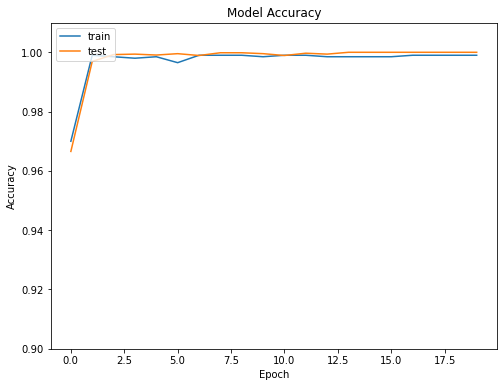

In [140]:
# Plot model accuracy per epoch - iterations of the model to show improvement on what it learned previously.
plt.figure(figsize = (8, 6))
plt.plot(model_alert.history['val_accuracy'])
plt.title('Model Accuracy')
plt.plot(model_alert.history['accuracy'])
plt.ylabel('Accuracy')
plt.ylim(0.90, 1.01)
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

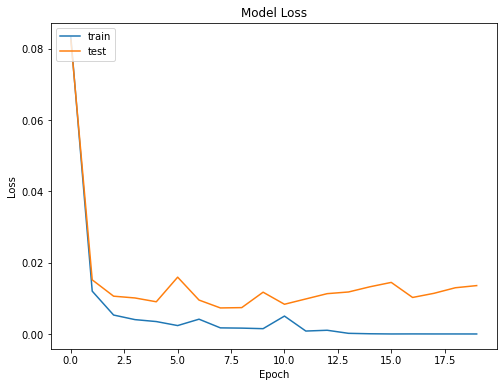

In [141]:
# Plot model losses per epoch
plt.figure(figsize = (8, 6))
plt.plot(model_alert.history['loss'])
plt.plot(model_alert.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [142]:
#Classification Report
y_pred = model.predict_classes(validation_generator)
print('Classification Report')
target_names = ['Open', 'Closed']
print(classification_report(validation_generator.classes, y_pred, target_names = target_names))

Classification Report
              precision    recall  f1-score   support

        Open       1.00      1.00      1.00      1000
      Closed       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



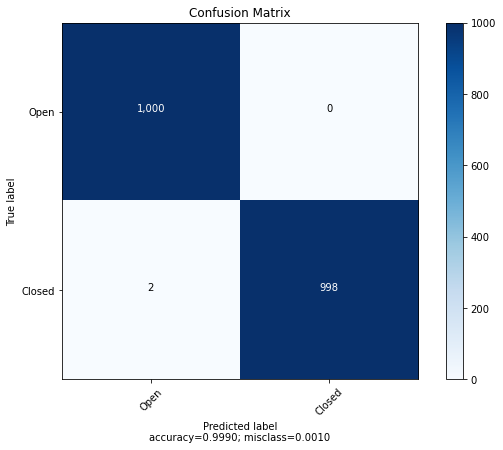

In [143]:
# Import confusion matrix plot function
import Confusion_Matrix

# Assign confusion matrix to variable
conf_matrix =(confusion_matrix(validation_generator.classes, y_pred))

# Plot Confusion Matrix
plot_confusion_matrix(conf_matrix, 
                      normalize    = False,
                      target_names = ['Open', 'Closed'],
                      title        = "Confusion Matrix")

### Summary:

Prior models displayed errors primarily in generating false positives, raising the occurrence of false alarms. Due to the amount of time required for the eyes to remain in the closed position to be deemed asleep, false alarms were still a minor incidence. All models have demonstrated better performance in correctly predicting eyes in the closed position.

In terms of the data used to train this model. An improvement was obtained in training the model with a rectangular view of eye pairs only versus training with either a whole face or by detecting individual eyes. The eye pair training has reduced the occasional misclassification of a nostril or mouth as an eye. The adjustment of the image shape sizes from (24 x 48) to (24 x 24) also improved the model performance.

The third iteration of this model has provided the best results; both in accuracy, and recall. The corresponding file that implements this model in a live setting has performed well. The end product will monitor the eyes of the user and will start a timer for any instances where the user's eyes are closed. If eyes remain closed an the user is nearing a predetermined timer setting, the frame will become orange in color to warn the user. After reaching a second predetermined timer setting, the frame will become red, and an audible alert will be emitted. An image of the instance will be captured and saved to a file folder for later review. 

Prior to a larger scale deployment, additional datasets should be introduced to train the model. This would be necessary to deliver results similar to those obtained with this project for anyone using Eye Alert. Another approach would be to include a setup step within the model. This step would be an initial setup to train the model specificaly to the person utilizing Eye Alert.

